每个题不超过30min思考,进行学习

In [56]:
import time
# 多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'

## 数组
* 有限个**类型相同**的元素的**有序序列**

### √ 3.寻找最长无重复字符串(看答案写上) -- -2/10 0:41 上午
给定一个字符串，请你找出其中不含有重复字符的 最长子串 的长度。 
```
shi'li：
输入: "abcabcbb"
输出: 3 
解释: 因为无重复字符的最长子串是 "abc"，所以其长度为 3。

```

#### 集合移除左半部分方法
```python
while s[i] in lookup:
    lookup.remove(s[left])
```

In [57]:
# 自己写的
s = "abcabcbb"
lists = list(s)
start = 0
end = 0
noduplicate = []
length_max = 0
for i, item in enumerate(lists,1):
    if item not in noduplicate:
        length_new = i - start
        noduplicate.append(item)
        if length_new > length_max:
            length_max = length_new        
    else:
        start += noduplicate.index(item) + 1
length_max

3

In [58]:
# 主要思想:滑动窗口 
s = "abcabcbb"
# s = "abca"
# s = "pwwkew"

class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        if not s: 0
        left = 0
        lookup = set()
        n = len(s)
        max_len = 0
        cur_len = 0
        for i in range(n):
            cur_len += 1
            while s[i] in lookup:
                lookup.remove(s[left])
                left += 1
                cur_len -= 1
            if cur_len > max_len:max_len = cur_len
            lookup.add(s[i])  # 新建了一个滑动窗口
        return max_len


solution = Solution() # 实例化!!!!!
solution.lengthOfLongestSubstring(s)
print((solution.lengthOfLongestSubstring(s)))

3

3


### ✔155. 最小栈 2/11 8:34 下午 - 2/11 10:00 下午
设计一个支持 push，pop，top 操作，并能在常数时间内检索到最小元素的栈。

push(x) -- 将元素 x 推入栈中。
pop() -- 删除栈顶的元素。
top() -- 获取栈顶元素。
getMin() -- 检索栈中的最小元素。
```
示例:

MinStack minStack = new MinStack();
minStack.push(-2);
minStack.push(0);
minStack.push(-3);
minStack.getMin();   --> 返回 -3.
minStack.pop();
minStack.top();      --> 返回 0.
minStack.getMin();   --> 返回 -2.
```

In [59]:
# 核心思想: 定义辅助栈helper() 提升查找最小值速度
class MinStack:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.mylist = []
        self.helper = []

    def push(self, x: int) -> None:
        self.mylist.append(x)
        if len(self.helper) == 0 or x <= self.helper[-1]:
            self.helper.append(x)

    def pop(self) -> None:
        top = self.mylist.pop()
        if self.helper and top == self.helper[-1]:
            self.helper.pop()
        return top

    def top(self) -> int:
        return self.mylist[-1]

    def getMin(self) -> int:
        # 注意此处不能是等于 否则会改变一个另一个也会变
        if self.helper:
             return self.helper[-1]
           


# Your MinStack object will be instantiated and called as such:
obj = MinStack()
obj.push(-2)
obj.push(0)
obj.push(-3)
# obj.mylist
# print(obj.getMin())
# obj.pop()
obj.mylist
# print(obj.top())
print((obj.getMin()))

[-2, 0, -3]

-3


### √ 169. 多数元素 2/11 10:07 下午 - 2/11 10:46 下午
给定一个大小为 n 的数组，找到其中的多数元素。多数元素是指在数组中出现次数大于 ⌊ n/2 ⌋ 的元素。

你可以假设数组是非空的，并且给定的数组总是存在多数元素。
```

示例 1:

输入: [3,2,3]
输出: 3
示例 2:

输入: [2,2,1,1,1,2,2]
输出: 2
```

In [60]:
# 排序法,自己写的
class Solution:
    def majorityElement(self, nums) -> int:
        nums.sort()
        return nums[(len(nums)-1)//2]
        
nums = [2,2,1,1,1,2,2]
solution = Solution()
result = solution.majorityElement(nums)
print(result)

2


In [61]:
# Boyer-Moore 投票算法
class Solution:
    def majorityElement(self, nums) -> int:
        count = 0
        candidate = None
        for num in nums:
            if count == 0:
                candidate = num
            count += (1 if num == candidate else -1)
        
        return candidate
        
        
nums = [2,2,1,1,1,2,2]
solution = Solution()
result = solution.majorityElement(nums)
print(result)

2


### √ 283. 移动零  2/12 9:49 上午 - 2/12 10:48 上午
给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

```
示例:

输入: [0,1,0,3,12]
输出: [1,3,12,0,0]
说明:

必须在原数组上操作，不能拷贝额外的数组。
尽量减少操作次数。
```


In [62]:
# 自己写的,费时 数组操作
class Solution:
    def moveZeroes(self, nums) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        count = 0
        while True:
            try:
                nums.remove(0)
                count += 1

            except:
                nums.extend([0]*count)
                break
        
nums = [0,1,0,3,12]
solution = Solution()
result = solution.moveZeroes(nums)
nums

[1, 3, 12, 0, 0]

In [63]:
# 法2: 一次遍历,双指针,检测到0则交换,省时间
class Solution:
    def moveZeroes(self, nums) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        if not nums:
            return 0
        j = 0
        for i in range(len(nums)):
            if nums[i] != 0:   # 只有nums[i] != 0 时,j才会加1往前走
                nums[j],nums[i] == nums[i],nums[j]
                j += 1 
                
nums = [0,1,0,3,12]
solution = Solution()
result = solution.moveZeroes(nums)
nums

[0, 1, 0, 3, 12]

### √ 461. 汉明距离 2/12 3:32 下午 -  2/12 4:17 下午
两个整数之间的汉明距离指的是这两个数字对应二进制位不同的位置的数目。

给出两个整数 x 和 y，计算它们之间的汉明距离。

注意：
0 ≤ x, y < 2^31.
```
示例:

输入: x = 1, y = 4

输出: 2

解释:
1   (0 0 0 1)
4   (0 1 0 0)
       ↑  ↑

上面的箭头指出了对应二进制位不同的位置。
```

In [64]:
class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        return bin(x^y).count('1')  # .count()  计数
        
x = 1
y = 14
solution = Solution()
result = solution.hammingDistance(x,y)
result

4

### √ 581. 最短无序连续子数组 2/12 5:02 下午 - 

**注意中括号[]不能随便用,要表示先后关系只能用()**

给定一个整数数组，你需要寻找一个连续的子数组，如果对这个子数组进行升序排序，那么整个数组都会变为升序排序。

你找到的子数组应是最短的，请输出它的长度。
```
示例 1:

输入: [2, 6, 4, 8, 10, 9, 15]
输出: 5
解释: 你只需要对 [6, 4, 8, 10, 9] 进行升序排序，那么整个表都会变为升序排序。
说明 :

输入的数组长度范围在 [1, 10,000]。
输入的数组可能包含重复元素 ，所以升序的意思是<=。
```

In [65]:
class Solution:
    def findUnsortedSubarray(self, nums) -> int:
        nums_sorted = sorted(nums)
        print((nums,nums_sorted))
        if not [(nums > nums_sorted) - (nums < nums_sorted)]:
            return 0  
        else:
            end = 0
            start = 0
            for i in range(len(nums)):
                if nums[i] != nums_sorted[i]:
                    start = i
                    break
            for i in range(1,len(nums)):
                if nums[-i] != nums_sorted[-i]:
                    end = len(nums)-i
                    break

            length = end - start + 1
            return length

    
# nums = [2,6,4,8,9,22,15]
nums = [1,2,3,4]
solution = Solution()
result = solution.findUnsortedSubarray(nums)
result

([1, 2, 3, 4], [1, 2, 3, 4])


1

### [困难，未做]4. 寻找两个有序数组的中位数 2月18, 3:09 - 
给定两个大小为 m 和 n 的有序数组 nums1 和 nums2。

请你找出这两个有序数组的中位数，并且要求算法的时间复杂度为 O(log(m + n))。

你可以假设 nums1 和 nums2 不会同时为空。
``` python
示例 1:

nums1 = [1, 3]
nums2 = [2]

则中位数是 2.0
示例 2:

nums1 = [1, 2]
nums2 = [3, 4]

则中位数是 (2 + 3)/2 = 2.5
```


In [66]:
nums1 = [1, 2] 
nums2 = [3, 4]
nums1.append

<function list.append(object, /)>

In [67]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-67-49ab5549eb17>, line 3)

## 堆栈stack

### 20. 有效的括号 2/10 10:10 上午 - 2/10 3:56 下午
**注意: range(x)取不到x**

给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串，判断字符串是否有效。

有效字符串需满足：

左括号必须用相同类型的右括号闭合。
左括号必须以正确的顺序闭合。
注意空字符串可被认为是有效字符串。


``` 
示例 1:
输入: "()"
输出: true
示例 2:

输入: "()[]{}"
输出: true
示例 3:

输入: "(]"
输出: false
示例 4:

输入: "([)]"
输出: false
示例 5:

输入: "{[]}"
输出: true

```

In [ ]:
# s = "()[]{}"
# s = "{[]}"
# s = "()"
s = ")]"
# s = "([)]"
s[-1]
len(s)/2

In [ ]:
# answer
# 主要思想:堆栈stack
class Solution(object):
    def isValid(self, s):
        """
        :type s: str
        :rtype: bool
        """

        # The stack to keep track of opening brackets.
        stack = []

        # Hash map for keeping track of mappings. This keeps the code very clean.
        # Also makes adding more types of parenthesis easier
        mapping = {")": "(", "}": "{", "]": "["}

        # For every bracket in the expression.
        for char in s:

            # If the character is an closing bracket
            if char in mapping:

                # Pop the topmost element from the stack, if it is non empty
                # Otherwise assign a dummy value of '#' to the top_element variable
                top_element = stack.pop() if stack else '#'

                # The mapping for the opening bracket in our hash and the top
                # element of the stack don't match, return False
                if mapping[char] != top_element:
                    return False
            else:
                # We have an opening bracket, simply push it onto the stack.
                stack.append(char)

        # In the end, if the stack is empty, then we have a valid expression.
        # The stack won't be empty for cases like ((()
        return not stack

In [ ]:
solution = Solution() # 实例化!!!!!
solution.isValid(s)

In [ ]:
# try2:
class Solution:
    def isValid(self, s: str) -> bool:
        dec = {  '(': ')',
               '{': '}', 
               '[': ']' }
        s = list(s)
        print(s)
        if len(s) == 0:return True
        if (len(s) % 2) == 1:return False # 奇数个时  

#     def cellpop()
    
        while s:
            for i in range(int(len(s)/2)):  # 注意range(x)取不到x 
                print(i)
                if s[i] in dec:
                    if dec[s[i]] == s[i+1]:
                        s.pop(i+1)
                        s.pop(i)
                        print(('s=',s))
                        break
                    else:pass
            else:
                print('wrong')
                return False
        return True

In [ ]:
# try1:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) == 0:return True
        if (len(s) % 2) == 1:return False # 奇数个时      
        left = s[0]
        right_exp = dec[s[0]]
        right_ind = s.index(right_exp)
        if (s.index % 2) == 0:return False 
        else:
            s_cell = s[1:(s.index-1)]
            symbolcell(s_cell)
        print(left,right_exp,right_ind)
    
    def symbolcell(self, s_cell):
        for i in range(len(s_cell)-1):

## 链表

### 21. 合并两个有序链表 -- 不懂 2/10 4:07 下午 -- 2/10 5:50 下午
将两个有序链表合并为一个新的有序链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 
```
示例：

输入：1->2->4, 1->3->4
输出：1->1->2->3->4->4
```



In [ ]:
l1 = [1,2,4]
l2 = [1,3,4]

In [ ]:
class Solution:
    def mergeTwoLists(self, l1, l2):
        # maintain an unchanging reference to node ahead of the return node.
        prehead = ListNode(-1)

        prev = prehead
        while l1 and l2:
            if l1.val <= l2.val:
                prev.next = l1
                l1 = l1.__next__
            else:
                prev.next = l2
                l2 = l2.__next__            
            prev = prev.__next__

        # exactly one of l1 and l2 can be non-null at this point, so connect
        # the non-null list to the end of the merged list.
        prev.next = l1 if l1 is not None else l2

        return prehead.__next__

In [ ]:
solution = Solution()
result = solution.mergeTwoLists(l1,l2)

In [ ]:
class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        # maintain an unchanging reference to node ahead of the return node.
        prehead = ListNode(-1)

        prev = prehead
        while l1 and l2:
            if l1.val <= l2.val:
                prev.next = l1
                l1 = l1.__next__
            else:
                prev.next = l2
                l2 = l2.__next__            
            prev = prev.__next__

        # exactly one of l1 and l2 can be non-null at this point, so connect
        # the non-null list to the end of the merged list.
        prev.next = l1 if l1 is not None else l2

        return prehead.__next__

## 递归 

### 70. 爬楼梯(程序自己写)  2/10 10:06 下午 - 2/11 11:40 上午
假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

注意：给定 n 是一个正整数。
```
示例 1：

输入： 2
输出： 2
解释： 有两种方法可以爬到楼顶。
1.  1 阶 + 1 阶
2.  2 阶
示例 2：

输入： 3
输出： 3
解释： 有三种方法可以爬到楼顶。
1.  1 阶 + 1 阶 + 1 阶
2.  1 阶 + 2 阶
3.  2 阶 + 1 阶

```

In [90]:
# 暴力解法(递归, 状态空间)
class Solution:
    def climbStairs_step(self, i , n):
        global sum
        if i > n:
            return 
        if i == n:
            sum += 1
            return
        return self.climbStairs_step(i+1,n), self.climbStairs_step(i+2,n)
    
    def climbStairs(self, n: int) -> int: 
        global sum
        sum = 0
        self.climbStairs_step(0, n)
#         print(sum)
        return sum

In [91]:
n = 5
solution = Solution()
result = solution.climbStairs(n)
print(result)

8


In [68]:
# 记忆化递归(修复的递归树)  -- 未

In [69]:
# 动态规划法: 到达第 ii 阶的方法总数就是到第 (i-1)(i−1) 阶和第 (i-2)(i−2) 阶的方法数之和。
# dp[i]=dp[i−1]+dp[i−2]
class Solution:
    def climbStairs(self, n):
        dp = [0,1,2]
        for i in range(3,n+1):
            dp.append(dp[i-2] + dp[i-1])
            
        return dp[n]
            
n = 10
solution = Solution()
result = solution.climbStairs(n)
print(result)

89


In [70]:
# 斐波那契数
class Solution:
    def climbStairs(self, n):
        if n==1:return 1
        if n==2:return 2
        first = 1
        second = 2
        for i in range(3,n): 
            third = first + second
            first = second
            second = third
        return second
            
n = 10
solution = Solution()
result = solution.climbStairs(n)
print(result)

55


## 动态规划
* 动态规划背后的基本思想非常简单。大致上，若要解一个给定问题，我们需要解其不同部分（即**子问题**），再根据子问题的解以得出原问题的解。
* 步骤：
    * **建立动态规划数组dp**
    * **讨论 最后加入最后一个元素 和 不加入最后一个元素 的情况**
 

### √ 53. 最大子序和 2/10 6:09 下午 - 2/10 10:02 下午
2月18, 3:36 - 2月18, 4:41

给定一个整数数组 nums ，找到一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

```
示例:

输入: [-2,1,-3,4,-1,2,1,-5,4],
输出: 6
解释: 连续子数组 [4,-1,2,1] 的和最大，为 6。
进阶:
```
如果你已经实现复杂度为 O(n) 的解法，尝试使用更为精妙的分治法求解。


In [71]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
max_sum = 0
for i in range(1,len(nums)):
    if nums[i-1] > 0:
        nums[i] = nums[i-1] + nums[i]
    max_sum = max(nums[i], max_sum)
max_sum

6

In [72]:
# 贪心算法
nums = [-2,1,-3,4,-1,2,1,-5,4]
class Solution:
    def maxSubArray(self, nums: 'List[int]') -> 'int':
        n = len(nums)
        curr_sum = max_sum = nums[0]

        for i in range(1, n):
            curr_sum = max(nums[i], curr_sum + nums[i])
            max_sum = max(curr_sum, max_sum)

        return max_sum
    
solution = Solution()
result = solution.maxSubArray(nums)
print(result)

6


In [73]:
# 动态规划 -- 实时改变数组
nums = [-2,1,-3,4,-1,2,1,-5,4]
class Solution:
    def maxSubArray(self, nums: 'List[int]') -> 'int':
        n = len(nums)
        max_sum = nums[0]

        for i in range(1, n):
            if nums[i-1] > 0:
                nums[i] += nums[i-1] 
            max_sum = max(nums[i], max_sum)

        return max_sum
    
solution = Solution()
result = solution.maxSubArray(nums)
print(result) 

6


### 70. 爬楼梯(程序自己写)  2/10 10:06 下午 - 2/11 11:40 上午
    2月18,5:36 - 2月18， 6：03

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

注意：给定 n 是一个正整数。
```
示例 1：

输入： 2
输出： 2
解释： 有两种方法可以爬到楼顶。
1.  1 阶 + 1 阶
2.  2 阶
示例 2：

输入： 3
输出： 3
解释： 有三种方法可以爬到楼顶。
1.  1 阶 + 1 阶 + 1 阶
2.  1 阶 + 2 阶
3.  2 阶 + 1 阶

```

In [74]:
# 动态规划法核心公式: 
# 加入最后一个台阶即：到达第 ii 阶的方法总数就是到第 (i-1)(i−1) 阶和第 (i-2)(i−2) 阶的方法数之和。
# dp[i]=dp[i−1]+dp[i−2]

In [92]:
n = 5
dp = [1, 1]
for i in range(2,n+1):
    dp.append(dp[i-1] + dp[i-2])
dp
dp[-1]

[1, 1, 2, 3, 5, 8]

8

### √ 121. 买卖股票的最佳时机 【2月18, 7：05 】-【2月18 8：10】
给定一个数组，它的第 i 个元素是一支给定股票第 i 天的价格。

如果你最多只允许完成一笔交易（即买入和卖出一支股票），设计一个算法来计算你所能获取的最大利润。

注意你不能在买入股票前卖出股票。

``` python
示例 1:

输入: [7,1,5,3,6,4]
输出: 5
解释: 在第 2 天（股票价格 = 1）的时候买入，在第 5 天（股票价格 = 6）的时候卖出，最大利润 = 6-1 = 5 。
     注意利润不能是 7-1 = 6, 因为卖出价格需要大于买入价格。
示例 2:

输入: [7,6,4,3,1]
输出: 0 
解释: 在这种情况下, 没有交易完成, 所以最大利润为 0。
```
        

In [103]:
nums = [7,1,5,3,6,4]

num_min = nums[0]
profit = [0]

for i in range(1,len(nums)):
    num_min = min(nums[i], num_min)
    profit.append(max(nums[i] - num_min, profit[i-1]))
profit
profit[-1]
        
    

[0, 0, 4, 4, 5, 5]

5

### √ 198. 打家劫舍 2/11 10:54 下午 - 2/12 9:46 上午
2月18, 4:54 - 2月18, 5:27

你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警。

给定一个代表每个房屋存放金额的非负整数数组，计算你在不触动警报装置的情况下，能够偷窃到的最高金额。

```
示例 1:

输入: [1,2,3,1]
输出: 4
解释: 偷窃 1 号房屋 (金额 = 1) ，然后偷窃 3 号房屋 (金额 = 3)。
     偷窃到的最高金额 = 1 + 3 = 4 。
示例 2:

输入: [2,7,9,3,1]
输出: 12
解释: 偷窃 1 号房屋 (金额 = 2), 偷窃 3 号房屋 (金额 = 9)，接着偷窃 5 号房屋 (金额 = 1)。
     偷窃到的最高金额 = 2 + 9 + 1 = 12 。
```

#### 动态规划核心思想:
* 动态规划公式:dp[i] = max(dp[i-1], dp[i-2] + nums[i-1])
* 不能偷相邻的两栋房子，方案无非两种：
* 方案一：挑选的房子中包含最后一栋；
* 方案二：挑选的房子中不包含最后一栋；
* 获得的最大收益的最终方案，一定在这两种方案中产生

In [ ]:
# 核心思想:
# 动态规划公式:dp[i] = max(dp[i-1], dp[i-2] + nums[i-1])
# 不能偷相邻的两栋房子，方案无非两种：
# 方案一：挑选的房子中包含最后一栋；
# 方案二：挑选的房子中不包含最后一栋；
# 获得的最大收益的最终方案，一定在这两种方案中产生
nums = [2,7,9,3,1]
dp = []  # save the max_value in each length of given list
dp.extend([nums[0],max(nums[0],nums[1])])

In [ ]:
dp[1] = max(nums)
for i in range(2,len(nums)):
    dp.append(max(dp[i-1], dp[i-2]+nums[i]))
dp
dp[-1]

## 数学

### 7.整数反转 【2月18 8：42】-

给出一个 32 位的有符号整数，你需要将这个整数中每位上的数字进行反转。

``` python
示例 1:

输入: 123
输出: 321
示例 2:

输入: -123
输出: -321
示例 3:

输入: 120
输出: 21
注意:

假设我们的环境只能存储得下 32 位的有符号整数，则其数值范围为 [−231,  231 − 1]。请根据这个假设，如果反转后整数溢出那么就返回 0。
```

In [107]:
num = 123
num_reverse = num//100 + (num%100//10)*10 + (num%100%10)*100
num_reverse

321

In [105]:
2**31

2147483648

## 二叉树

### 101. 对称二叉树(二叉树不明白) 2/11 1:06 下午 - 2/11 2:34 下午
给定一个二叉树，检查它是否是镜像对称的。

```
例如，二叉树 [1,2,2,3,4,4,3] 是对称的。

    1
   / \
  2   2
 / \ / \
3  4 4  3
但是下面这个 [1,2,2,null,3,null,3] 则不是镜像对称的:

    1
   / \
  2   2
   \   \
   3    3
说明:

如果你可以运用递归和迭代两种方法解决这个问题，会很加分。
```

In [ ]:
# 自己写的 判断数组 二叉树不行
class Solution:
    def isSymmetric(self, root) -> bool:
        import math
        length = len(root)
        line_sum = math.log(length+1, 2)
#         print(line_sum)
        if line_sum % 1 != 0:return False
        

        for i in range(int(line_sum)):
            for j in range(int(math.pow(2,(i-1)))): 
                if root[int(math.pow(2,i)-1+j)] != root[int(math.pow(2,(i+1))-2-j)]:
                    return False
        return True

In [ ]:
global null
null = '#'
root = [1,2,2,null,3,null,3]
root = [1,2,2,3,4,4,3]
solution = Solution()
result = solution.isSymmetric(root)
print(result)

In [ ]:
# 递归方法
class Solution(object):
	def isSymmetric(self, root):
		"""
		:type root: TreeNode
		:rtype: bool
		"""
		if not root:
			return True
		def dfs(left,right):
			# 递归的终止条件是两个节点都为空
			# 或者两个节点中有一个为空
			# 或者两个节点的值不相等
			if not (left or right):
				return True
			if not (left and right):
				return False
			if left.val!= right.val:
				return False
			return dfs(left.left,right.right) and dfs(left.right,right.left)
		# 用递归函数，比较左节点，右节点
		return dfs(root.left,root.right)

In [ ]:
root = [1,2,2,null,3,null,3]
solution = Solution()
result = solution.isSymmetric(root)
print(result)

### 104. 二叉树的最大深度 2/13 10:27 上午 - 
给定一个二叉树，找出其最大深度。

二叉树的深度为根节点到最远叶子节点的最长路径上的节点数。

说明: 叶子节点是指没有子节点的节点。

```
示例：
给定二叉树 [3,9,20,null,null,15,7]，

    3
   / \
  9  20
    /  \
   15   7
返回它的最大深度 3 。

````

In [ ]:
# 树节点TreeNode定义
class TreeNode(object):
    """ Definition of a binary tree node."""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [ ]:
# 递归-DFS深度搜索策略
class Solution:
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """ 
        if root is None: 
            return 0 
        else: 
            left_height = self.maxDepth(root.left) 
            right_height = self.maxDepth(root.right) 
            return max(left_height, right_height) + 1

In [ ]:
# 迭代
class Solution:
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """ 
        stack = []
        if root is not None:
            stack.append((1, root))
        
        
        depth = 0
        while stack != []:
            current_depth, root = stack.pop()
            if root is not None:
                depth = max(depth, current_depth)
                stack.append((current_depth + 1, root.left))
                stack.append((current_depth + 1, root.right))
        
        return depth

## 字典，哈希表

### 1.两数之和

给定一个整数数组 nums 和一个目标值 target，请你在该数组中找出和为目标值的那 两个 整数，并返回他们的数组下标。你可以假设每种输入只会对应一个答案。但是，你不能重复利用这个数组中同样的元素。
```
示例:

给定 nums = [2, 7, 11, 15], target = 9
因为 nums[0] + nums[1] = 2 + 7 = 9
所以返回 [0, 1]
```


#### 字典使用和查字典方法
* 遍历列表同时查字典 -- 字典查找速度快
* 从第一个元素开始找出(target-n)的值,存储于dct中.
``` python
for i, n in enumerate(nums):
    if target - n in dct:
        return [dct[target - n], i]
    dct[n] = i
```

In [ ]:
nums = [2, 7, 11, 15]
target = 9

In [ ]:
# 主要思想: 
# 判断 if target - n in dct

class Solution:
    def twoSum(nums, target):
        dct = {}
        for i, n in enumerate(nums):
            if target - n in dct:
                return [dct[target - n], i]
            dct[n] = i
            
result = Solution.twoSum(nums,target)
result

In [ ]:
# 直接从数组中找
# 800ms so slow

In [ ]:
start = time.time()
class Solution:
    def twoSum(nums, target):
        for i, n in enumerate(nums):
            if (target - n) in nums[i+1:]:
                j = nums[i+1:].index(target - n)
                return [i, j+i+1]

result = Solution.twoSum(nums,target)
result

end = time.time()
print((start - end))




### 136. 只出现一次的数字 2/11 2:52 下午 - 2/11 7:38 下午
给定一个非空整数数组，除了某个元素只出现一次以外，其余每个元素均出现两次。找出那个只出现了一次的元素。
```
说明：

你的算法应该具有线性时间复杂度。 你可以不使用额外空间来实现吗？

示例 1:

输入: [2,2,1]
输出: 1
示例 2:

输入: [4,1,2,1,2]
输出: 4
```

In [ ]:
# 当nums列表长时非常费时 -- 自己写的
class Solution:
    def singleNumber(self, nums) -> int:
#         stack = []
#         map = {}
#         for num in nums:
#             if num not in stack:
#                 stack.append(num)
        length = len(nums)
        for i in range(length):
            if (nums[i] not in nums[:i]) & (nums[i] not in nums[i+1:]):
                return nums[i]

In [ ]:
nums = [4,1,2,1,2]
solution = Solution()
result = solution.singleNumber(nums)
print(result)

In [76]:
# 数组操作
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        no_duplicate_list = []
        for i in nums:
            if i not in no_duplicate_list: # 注意此处用2个if 的话会判断2次
                no_duplicate_list.append(i)
            else:
                no_duplicate_list.remove(i)                
        return no_duplicate_list.pop()

In [77]:
nums = [4,1,2,1,2]
solution = Solution()
result = solution.singleNumber(nums)
print(result)

4


In [78]:
# 哈希表 -- 是以要存的数字为索引,存入1
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        hash_table = {}
        for i in nums:
            try:
                hash_table.pop(i)
            except:
                hash_table[i] = 1
        return hash_table.popitem()[0]

nums = [4,1,2,1,2]
solution = Solution()
result = solution.singleNumber(nums)
print(result)

4


In [79]:
# 位异或方法
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        a = 0
        for i in nums:
            a ^= i
        return a
nums = [4,1,2,1,2]
solution = Solution()
result = solution.singleNumber(nums)
print(result)

4


In [80]:
# 数学方法
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        return 2 * sum(set(nums)) - sum(nums) # 注意集合函数set()
nums = [4,1,2,1,2]
solution = Solution()
result = solution.singleNumber(nums)
print(result)

TypeError: 'int' object is not callable

![图](https://pic.leetcode-cn.com/36d1ac5d689101cbf9947465e94753c626eab7fcb736ae2175f5d87ebc85fdf0-283_2.gif)

### 448. 找到所有数组中消失的数字 2/12 4:19 下午 - 2/12 4:53 下午

给定一个范围在  1 ≤ a[i] ≤ n ( n = 数组大小 ) 的 整型数组，数组中的元素一些出现了两次，另一些只出现一次。

找到所有在 [1, n] 范围之间没有出现在数组中的数字。

您能在不使用额外空间且时间复杂度为O(n)的情况下完成这个任务吗? 你可以假定返回的数组不算在额外空间内。
```
示例:

输入:
[4,3,2,7,8,2,3,1]

输出:
[5,6]
```


In [ ]:
# 方法二：原地修改方法 对i处位置的值为索引将其数字*-1

## 《图解算法》 


### 时间复杂度，大O时间
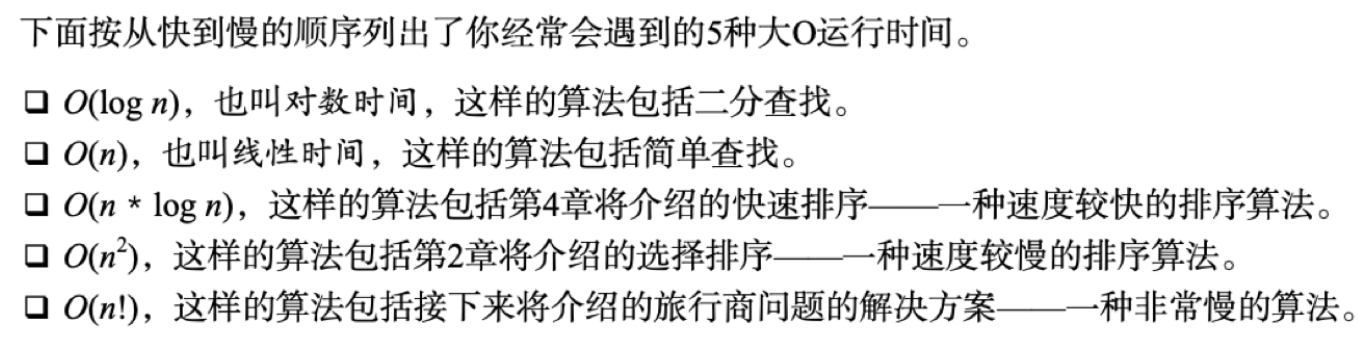

### 快速排序

In [ ]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        
        greater = [i for i in array[1:] if i > pivot]
        
        return quicksort(less) + [pivot] + quicksort(greater) 
print((quicksort([10, 5, 2, 3])))

### 散列表
* Python中的散列表为**字典**,散列表将键映射到值

In [ ]:
"""
查找,模拟映射关系
"""
book = dict()
book['apple'] = 2
book['milk'] = 3
book['avocado'] = 5
book

In [ ]:
book['milk']

In [ ]:
"""
防止重复
"""
voted = {} 
def check_voter(name):
    if voted.get(name):
        print ("kick them out!")
    else:
        voted[name] = True
        print ("let them vote!")

In [ ]:
check_voter('tom')

In [ ]:
check_voter('tom')

In [ ]:
"""
缓存数据
"""
cache = {} 
def get_page(url):    
    if cache.get(url):
        return cache[url]   
    else:     
        data = get_data_from_server(url)     
        cache[url] = data     
        return data

### 广度优先搜索 -- 图


In [ ]:
"""
实现图
"""
# map "you" to a list
graph = {} 
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"] 
graph["alice"] = ["peggy"] 
graph["claire"] = ["thom", "jonny"] 
graph["anuj"] = [] 
graph["peggy"] = [] 
graph["thom"] = [] 
graph["jonny"] = []
graph

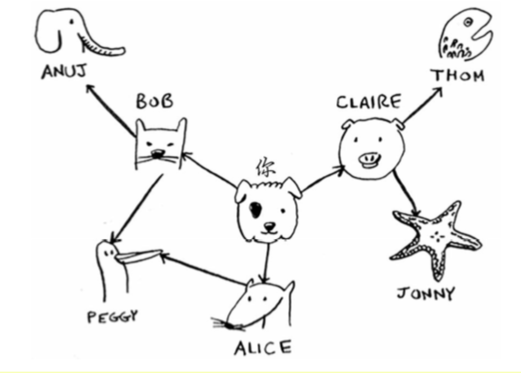

In [ ]:
"""
实现算法
"""
from collections import deque 

def person_is_seller(name):     
    return name[-1] == 'm' # a seller whose name finashed by 'm'

def search(name):
    search_queue = deque()   # 可使用函数deque来创建一个双端队列
    search_queue += graph["you"]
    searched = [] # use to record the person who have searched -- it is important
    while search_queue:     
        person = search_queue.popleft()
        if not person in searched:  # only inspect while did not have searched 
            if person_is_seller(person): 
                print(person + " is a mango seller!" )
                return True 
            else: 
                search_queue += graph[person] 
                searched.append(person)
    return False
search("you")

算法原理
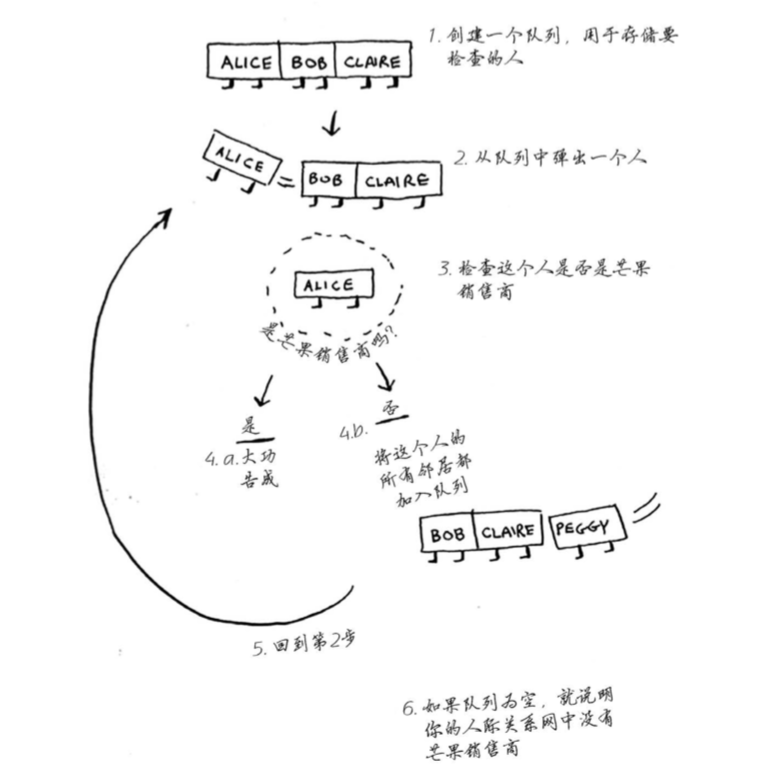

### 狄克斯特拉算法计算有权图
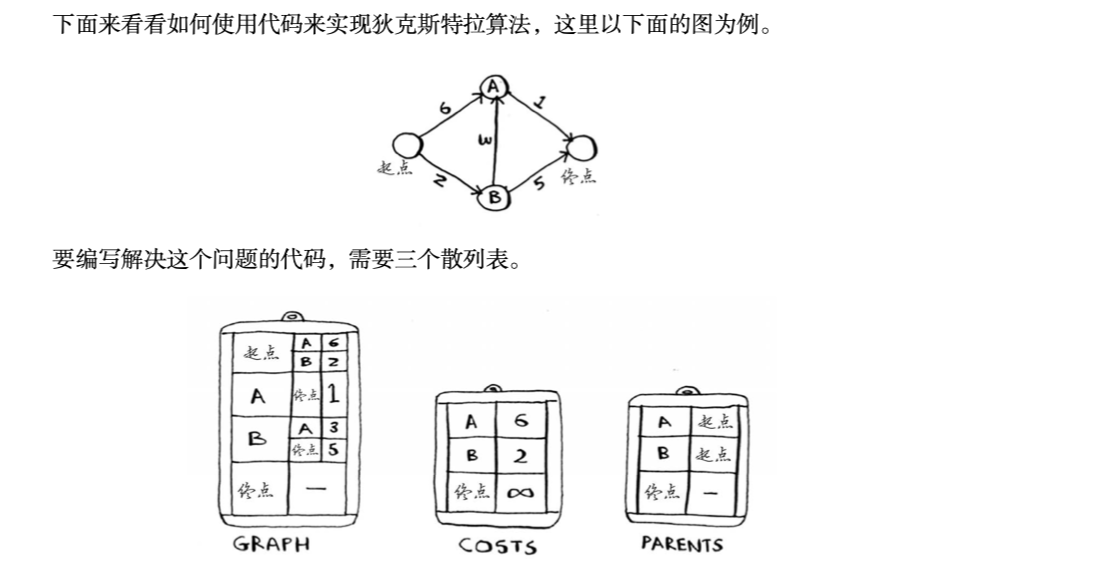

In [ ]:
"""
Graph hash table
"""
graph = {}
graph["start"] = {} 
graph["start"]["a"] = 6 
graph["start"]["b"] = 2

graph["a"] = {} 
graph["a"]["fin"] = 1 

graph["b"] = {} 
graph["b"]["a"] = 3 
graph["b"]["fin"] = 5

graph["fin"] = {} # 终结点无邻居

In [ ]:
# 获取起点的所有邻居
graph["start"].keys()

In [ ]:
# 获得权重
graph["start"]["a"]

In [81]:
"""
Costs hash table
"""
infinity = float("inf") 

costs = {} 
costs["a"] = 6 
costs["b"] = 2 
# 不知道到终点需要多长时间。对于还不知道的开销,你将其设置为无穷大。
costs["fin"] = infinity 
costs["fin"]

'\nCosts hash table\n'

inf

In [82]:
"""
Parents hash table
"""
parents = {} 
parents["a"] = "start" 
parents["b"] = "start" 
parents["fin"] = None
# 最后需要一个数组,用于记录处理过的节点,你不用处理多次。  
processed = []

'\nParents hash table\n'

arithmetic
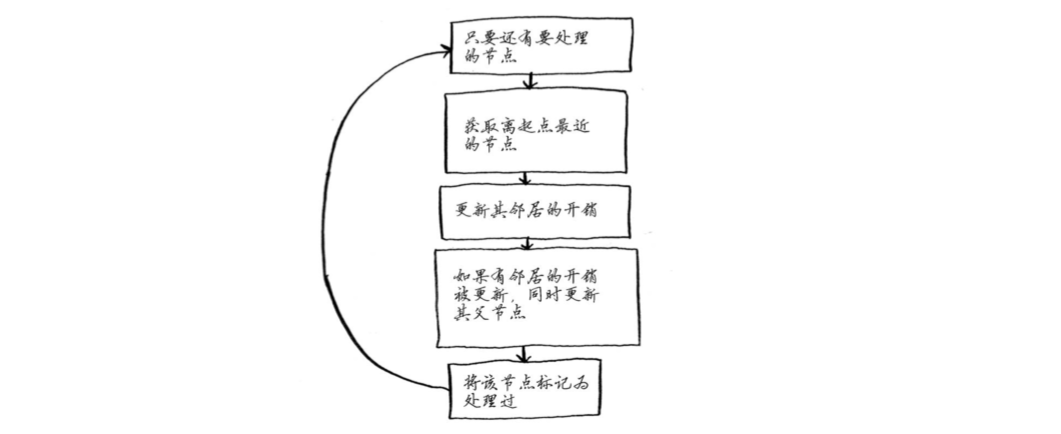    

In [83]:
def find_lowest_cost_node(costs):     
    lowest_cost = float("inf")      
    lowest_cost_node = None     
    for node in costs:  
        cost = costs[node] 
        if cost < lowest_cost and node not in processed: 
            lowest_cost = cost 
            lowest_cost_node = node     
    return lowest_cost_node

node = find_lowest_cost_node(costs) 

while node is not None:     
    cost = costs[node]     
    neighbors = graph[node]     
    for n in neighbors.keys(): 
        new_cost = cost + neighbors[n] 
        if costs[n] > new_cost: 
            costs[n] = new_cost 
            parents[n] = node     
    processed.append(node)     
    node = find_lowest_cost_node(costs)
print(cost)

NameError: name 'graph' is not defined

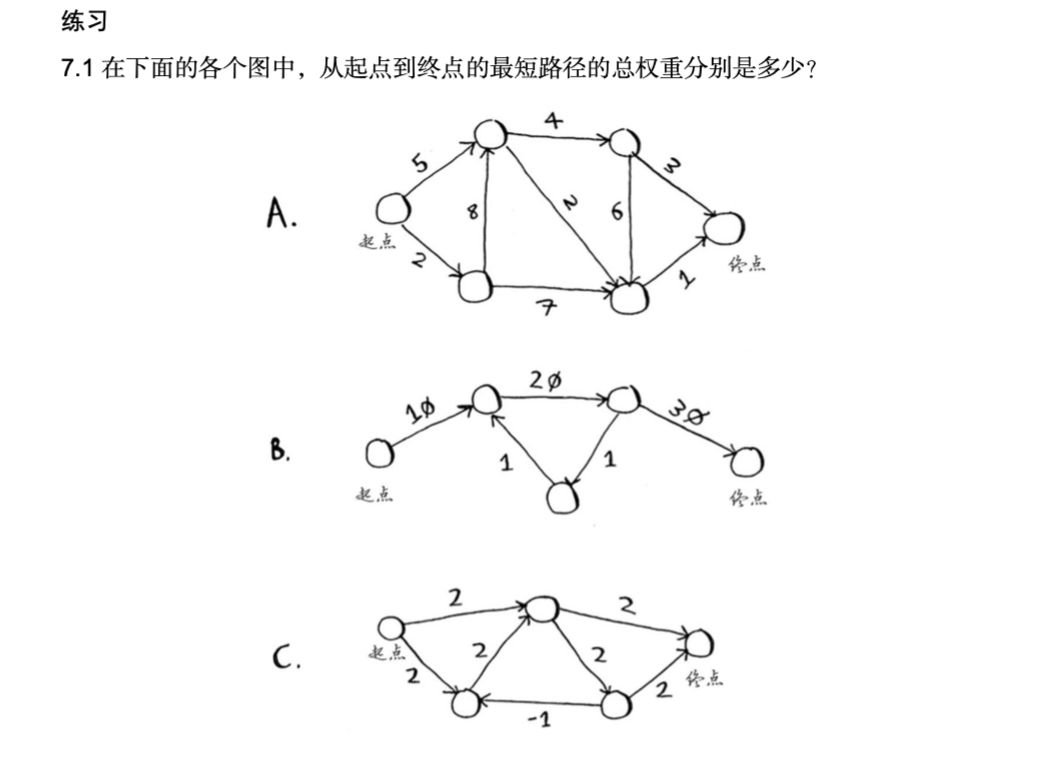

In [ ]:
# A -- 不对
"""
Graph hash table
"""
graph = {}
graph["start"] = {}
graph["start"]["a"] = 5
graph["start"]["b"] = 2
graph["a"] = {}
graph["a"]["c"] = 4
graph["a"]["d"] = 2
graph["b"] = {}     # init， important
graph["b"]["a"] = 8
graph["b"]["d"] = 7
graph["c"] = {}
graph["c"]["d"] = 6
graph["c"]["fin"] = 3
graph["d"] = {}
graph["d"]["fin"] = 1
graph["fin"] = {} # 终结点无邻居

"""
Costs hash table：cost to start
"""
infinity = float("inf")

costs = {}
costs["a"] = infinity
costs["b"] = 2
# 不知道到终点需要多长时间。对于还不知道的开销,你将其设置为无穷大。
costs["c"] = infinity
costs["d"] = infinity
costs["fin"] = infinity

"""
Parents hash table: only record the cost that knows
"""
parents = {}
parents["a"] = None
parents["b"] = "start"
parents["c"] = None
parents["d"] = None
parents["fin"] = None
# 最后需要一个数组,用于记录处理过的节点,你不用处理多次。
processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

node = find_lowest_cost_node(costs)
while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
        print(costs[n])
    processed.append(node)
    node = find_lowest_cost_node(costs)



### 贪婪算法
* 处理没有快速算法的问题 -- NP完全问题
* 每步都寻找局部最优解

集合覆盖问题

具体方法如下。  

(1) 列出每个可能的广播台集合,这被称为幂集(power set)。可能的子集有2n个。 

(2) 在这些集合中,选出覆盖全美50个州的最小集合。
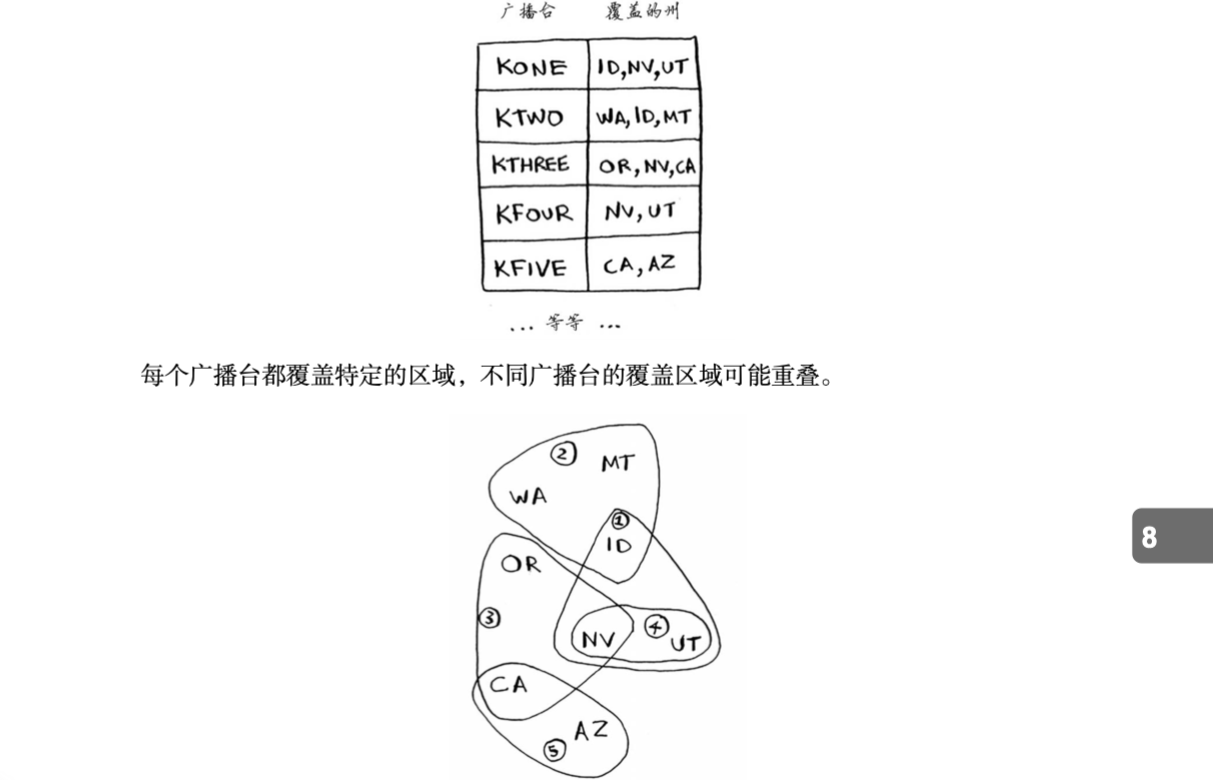

In [ ]:
# 不对
states_needed = set(["mt", "wa", "or", "id", "nv", "ut", "ca", "az"])

# 有可供选择的广播台清单,我选择使用散列表来表示它。 
stations = {} 
stations["kone"] = set(["id", "nv", "ut"]) 
stations["ktwo"] = set(["wa", "id", "mt"]) 
stations["kthree"] = set(["or", "nv", "ca"]) 
stations["kfour"] = set(["nv", "ut"]) 
stations["kfive"] = set(["ca", "az"])

final_stations = set() 

while states_needed:   
    best_station = None  # 存储最优  
    states_covered = set()
    for station, states_for_station in stations.items():
        covered = states_needed & states_for_station 
        if len(covered) > len(states_covered):   
            best_station = station   
            states_covered = covered
            
states_needed -= states_covered 
final_stations.add(best_station) 
print(final_stations)

### 动态规划
* 只能处理没有相互依赖关系
* 横向：加入新增商品价值 与 没加入该商品时最大价值（上一行） 比较，选择大的

公式
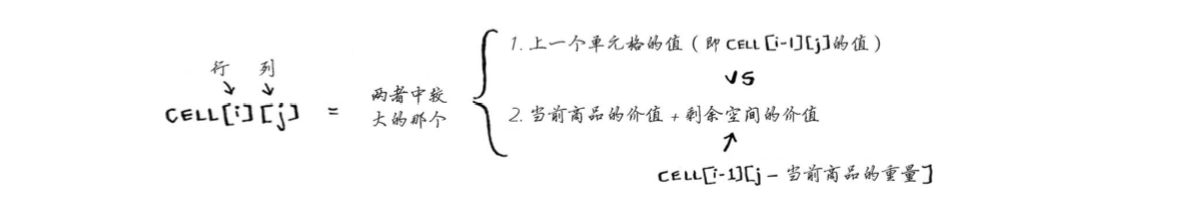

【例1】背包问题

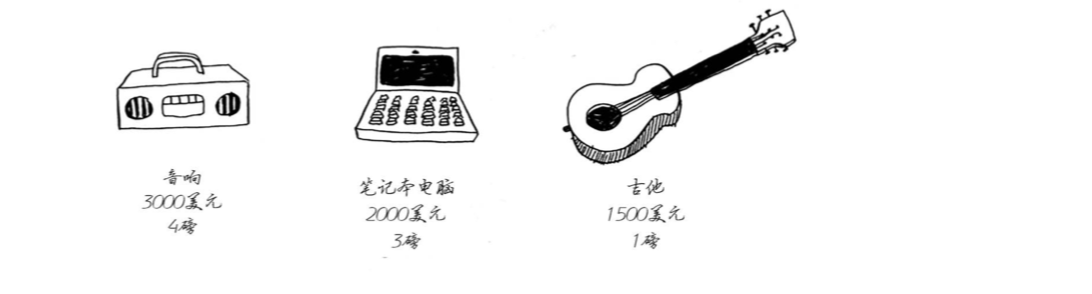

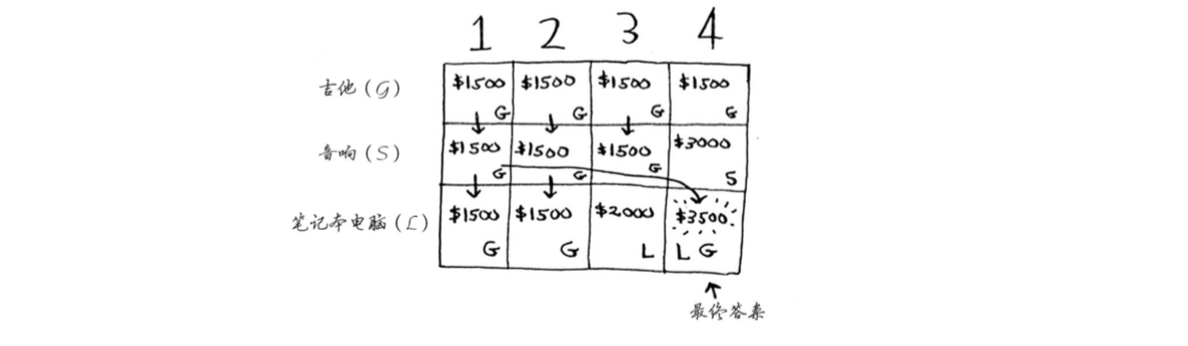

【例2】旅游行程最优化

横向：加入新增商品价值 与 没加入该商品时最大价值（上一行） 比较，选择大的

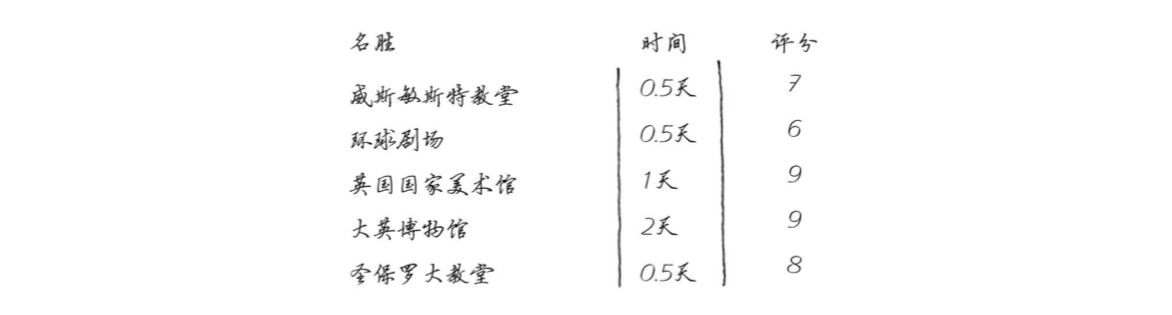

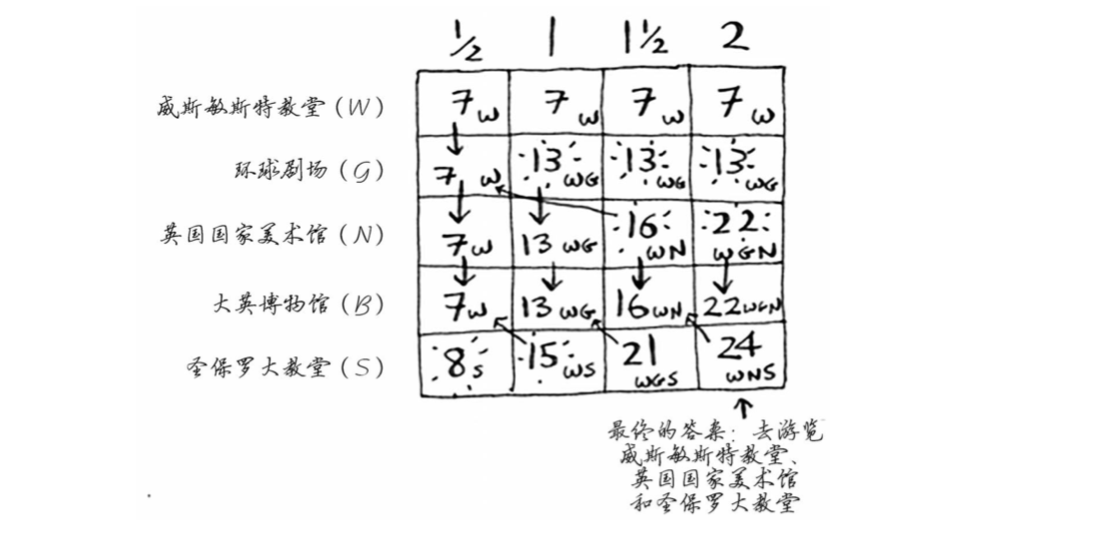

### 树 
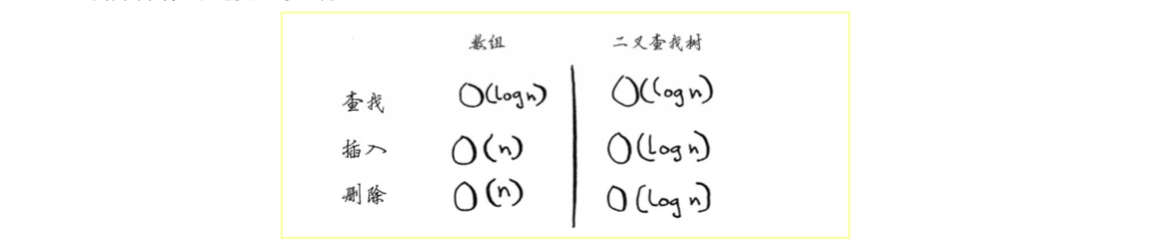
* 不能随机访问
* 平衡时效果才好


### 分布式算法（MapReduce）-- 并行算法的一种
* 可通过流行的开源工具Apache Hadoop来使用
* 基于两个简单的理念: 映射(map)函数和 归并(reduce)函数。

In [ ]:
# 映射函数 map
# 如果有100台计算机,而map能够自动将工作分配给这些计算机去完成就好了。
# 这样就可同时下载100个页面,下载速度将快得多!这就是MapReduce中“映射”部分基于的理念。
arr1 = [1, 2, 3, 4, 5]
arr2 = map(lambda x: 2 * x, arr1)
arr2

In [ ]:
map?

In [ ]:
# 归并reduce（）
arr1 = [1, 2, 3, 4, 5] 
reduce(lambda x,y: x+y, arr1)